In [1]:
import os
import glob
import sys
import importlib
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl
import pprint 
pp = pprint.PrettyPrinter(indent=4)
# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

In [2]:
util.set_sns_style(style='dark')
%matplotlib notebook

In [3]:
rootdir = '/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
rootdir = os.path.join(rootdir, 'jyr')
#experiment = 'vertical_strip/paired_experiments' 
experiment = 'hdeltac/stripgrid' 
strip_width = 10
strip_sep = 200
fig_id = os.path.join(rootdir.split('/My Drive')[1], experiment)
src_dir = os.path.join(rootdir, experiment)
save_dir = '/Users/julianarhee/Documents/rutalab/data/figures/{}/rdp'.format(experiment)
save_dir = save_dir.replace(" ", "")

print("Saving figures to:{}    {}".format('\n', save_dir))
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

Saving figures to:
    /Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/rdp


In [4]:
log_files = butil.get_log_files(src_dir=src_dir, experiment=experiment, rootdir=rootdir)

Found 17 tracking files.


In [5]:
# fpath = log_files[0]
# exp, datestr, fly_id, cond = butil.parse_info_from_filename(fpath, experiment)
# exp, datestr, fly_id, cond

In [ ]:
# # Load dataframes
# df0_all = butil.load_combined_df(os.path.join(src_dir, 'raw'), create_new=True)
# condition_list = df0_all['condition'].unique()
# print("There are {} unique conditions:".format(len(condition_list)))
# for ci, cond in enumerate(condition_list):
#     print(ci, cond)  

In [7]:
# print(trial_id)
# df_ = df0_all[df0_all['trial_id']==trial_id].copy()

In [26]:
trial_id='20220628-fly1_06282022-134621'
fpath = [f for f in log_files if '06282022-134621' in f][0]
print(fpath)
testdf = butil.load_dataframe(fpath)

/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/jyr/hdeltac/stripgrid/raw/06282022-134621_HDC_split_60D05_sytjGCaMP7f_Fly1_stripgrid_002.log


In [27]:
testdf = butil.parse_bouts(testdf)
boutdurs = butil.get_bout_durs(testdf, bout_varname='boutnum')
# boutdurs

In [28]:
filtdf_prev = butil.filter_bouts_by_dur(testdf.copy(), switch_method='previous')
filtdf_rev = butil.filter_bouts_by_dur(testdf.copy(), switch_method='reverse')

In [29]:
entry_ix = filtdf_prev[filtdf_prev['instrip']].iloc[0].name
entry_ix

4495

In [30]:
# strip_borders = butil.find_strip_borders(df_, entry_ix=None, strip_width=10, return_entry_sides=False,
#                         strip_sep=200, is_grid=True, get_all_borders=True)
entry_left_edge, entry_lefts = butil.check_entry_left_edge(filtdf_prev, entry_ix=entry_ix, return_bool=True)
entry_left_edge

False

In [31]:
entry_lefts

,entry_index,previous_outbout,entry_left_edge,consecutive_bout,consecutive_count
0,10934,3,True,1,0
1,11902,5,False,2,0
2,17303,7,False,2,1
3,17444,9,False,2,2
4,17518,11,False,2,3
5,17640,13,False,2,4
6,19755,15,False,2,5
7,20206,17,False,2,6
8,21227,19,False,2,7
9,21476,21,False,2,8


<IPython.core.display.Javascript object>


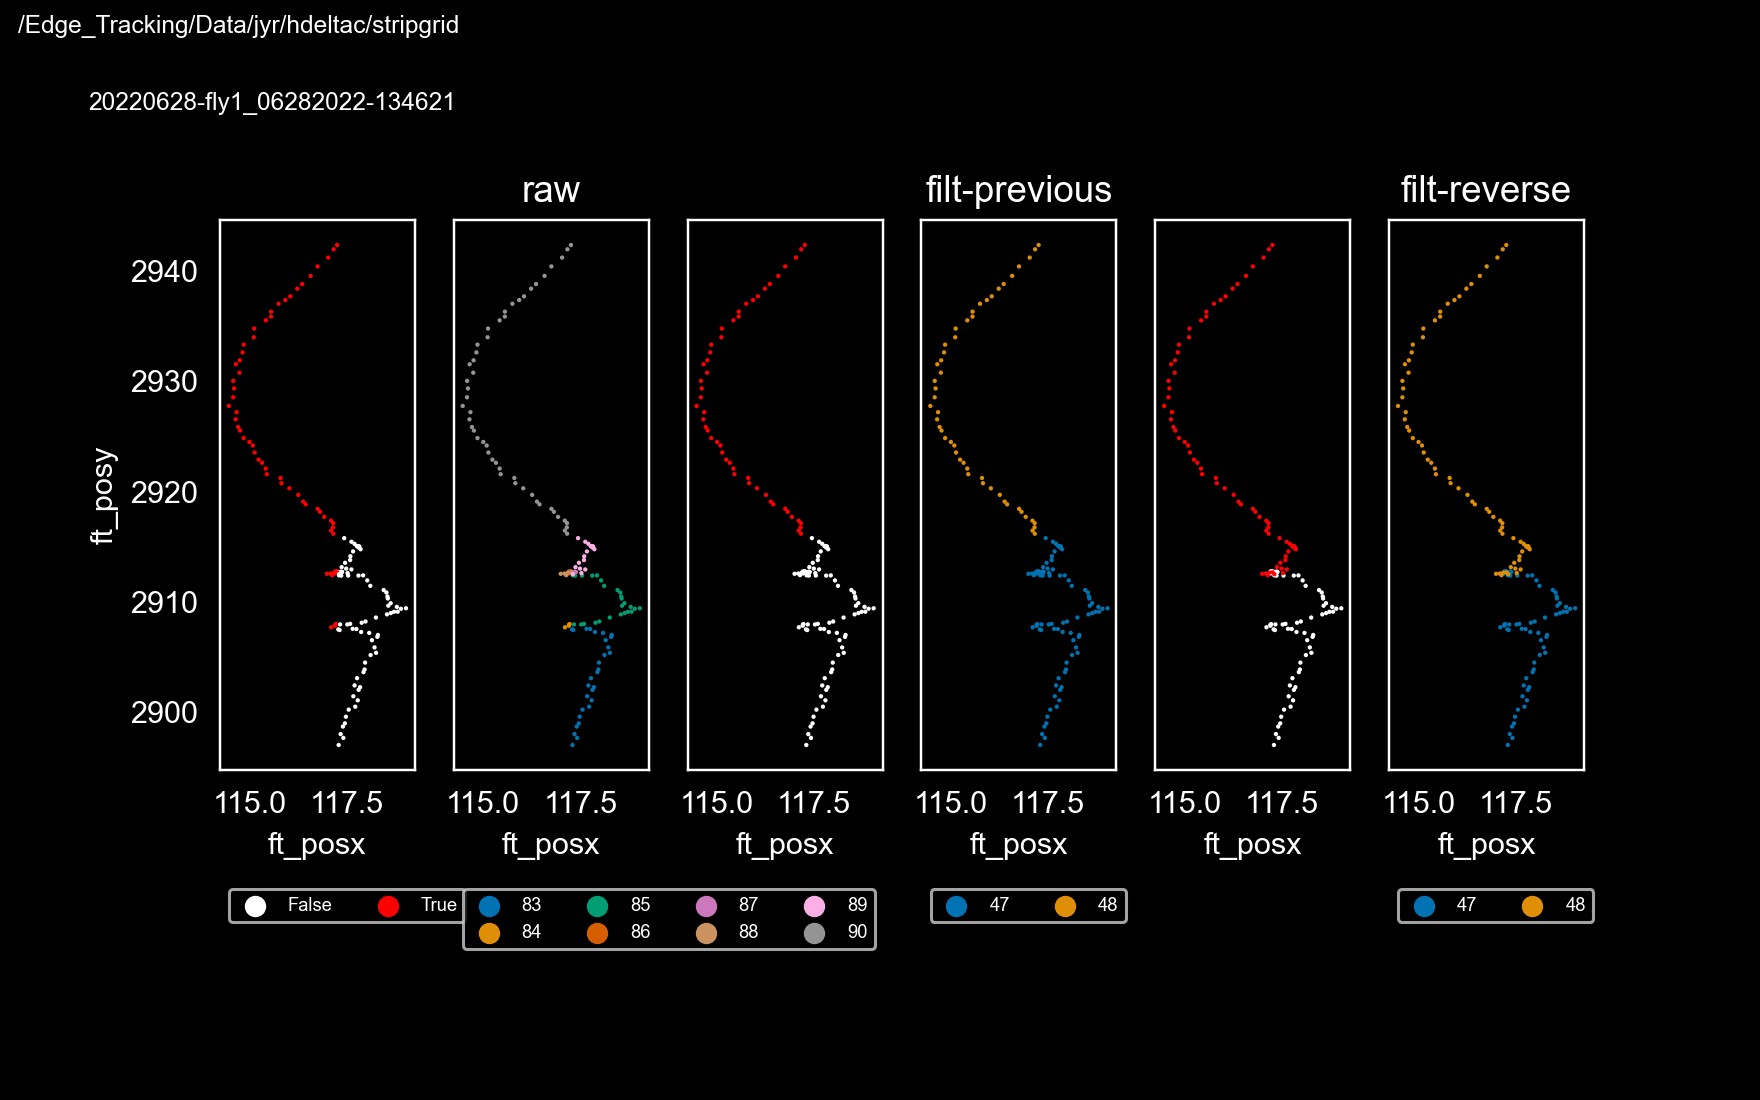

Text(0.05, 0.9, '20220628-fly1_06282022-134621')

In [41]:
#fig, ax = pl.subplots()
# ax=butil.plot_trajectory(df_[df_['boutnum']>=30], hue_varname='boutnum', palette='colorblind')
# ax.legend(bbox_to_anchor=(-0.2,-0.2), loc='upper left', fontsize=8, ncols=6)
# pl.subplots_adjust(bottom=0.4)
currdf = filtdf_rev[filtdf_rev['boutnum'].isin([47, 48])].copy() #[filtdf['boutnum']>=40]
r_ = testdf.loc[currdf.index]
fig, axn = pl.subplots(1,6, sharex=True, sharey=True, figsize=(8,5))
# traj
ax=axn[0]
ax = sns.scatterplot(x='ft_posx', y='ft_posy', hue='instrip', data=r_, ax=ax, 
                edgecolor='none', s=2, palette={True: 'r', False: 'w'})
#ax.set_title("N={} crossovers".format(n_crossovers), fontsize=7)
ax=axn[1]
ax = sns.scatterplot(x='ft_posx', y='ft_posy', hue='boutnum', data=r_, ax=ax, 
                edgecolor='none', s=2, palette='colorblind')
ax.set_title('raw')
#ax.set_title("N={} crossovers".format(n_crossovers), fontsize=7)
ax=axn[2]
f_ = filtdf_prev.loc[currdf.index]
# ax = sns.scatterplot(x='ft_posx', y='ft_posy',  data=plotdf, ax=ax, 
#                 edgecolor='none', s=2, c='gray')
ax = sns.scatterplot(x='ft_posx', y='ft_posy',  data=f_, ax=ax, 
                edgecolor='none', s=2, palette={True: 'r', False: 'w'}, hue='instrip')
ax=axn[3]
ax = sns.scatterplot(x='ft_posx', y='ft_posy',  data=f_, ax=ax, 
                edgecolor='none', s=2, palette='colorblind', hue='boutnum')
ax.set_title('filt-previous')
ax=axn[4]
f2_ = filtdf_rev.loc[currdf.index]
# ax = sns.scatterplot(x='ft_posx', y='ft_posy',  data=plotdf, ax=ax, 
#                 edgecolor='none', s=2, c='gray')
ax = sns.scatterplot(x='ft_posx', y='ft_posy',  data=f2_, ax=ax, 
                edgecolor='none', s=2, palette={True: 'r', False: 'w'}, hue='instrip')
ax=axn[5]
ax = sns.scatterplot(x='ft_posx', y='ft_posy',  data=f2_, ax=ax, 
                edgecolor='none', s=2, palette='colorblind', hue='boutnum')
ax.set_title('filt-reverse')
for ai, ax in enumerate(axn):
    if ai in [2, 4]:
        ax.legend_.remove()
    else:
        ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', fontsize=6, ncols=4)
pl.subplots_adjust(bottom=0.3, top=0.8)
util.label_figure(fig, fig_id)

fig.text(0.05, 0.9, trial_id, fontsize=8)

In [ ]:
tt = t_.copy()
for boutnum, d_ in t_.groupby(['boutnum']):
    if boutdurs[boutnum] < 0.5:
        prev_value = tt[tt['boutnum']==(boutnum-1)].iloc[-1]['instrip']
        tt.loc[d_.index, 'instrip'] = prev_value
        print(boutnum, prev_value)